# <Center> Diffusion Processes on Complex Networks - Lab 4</Center>

## <center> Roman Furman </center>

In [1]:
import imageio
import random
from typing import Dict
from typing import Tuple
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import warnings
warnings.filterwarnings("ignore")

# 1

In [2]:
def random_walk(num_steps: int, file_prefix: str) -> None:
    """
    Simulates a 2D random walk with num_steps steps, saves a snapshot of the walk at every step 
    as a png file with the file_prefix, and then creates a gif animation from the saved images.
    
    Args:
    - num_steps: an integer specifying the number of steps in the random walk.
    - file_prefix: a string representing the prefix of the image and gif files. The files will be 
                   named as file_prefix_0000.png, file_prefix_0001.png, etc., and the gif will be
                   named as file_prefix.gif.
                   
    Returns:
    - None.  Saves a series of PNG files and a GIF file.
    """
    u = 2*np.random.randint(0,2,size=(num_steps,2))-1
    walks_cum_sum = np.cumsum(u,axis=0)
    images = []
    for i in range(num_steps):
        plt.plot(walks_cum_sum[:i,0],walks_cum_sum[:i,1])
        filename = f"{file_prefix}_{i:04d}.png"
        plt.savefig(filename, dpi=300)
        images.append(imageio.imread(filename))
        plt.close()
    imageio.mimsave(f"{file_prefix}.gif", images, fps=10)

In [3]:
random_walk(50, "r_w")

In [4]:
class Agent:
    """
    A class representing an agent that can move on a lattice.

    Attributes:
    -----------
    x : int
        The x-coordinate of the agent's position.
    y : int
        The y-coordinate of the agent's position.
    """
    def __init__(self, x=0, y=0):
        """
        Initializes the Agent class with the given x and y coordinates.

        Parameters:
        -----------
        x : int, optional
            The initial x-coordinate of the agent's position. Default is 0.
        y : int, optional
            The initial y-coordinate of the agent's position. Default is 0.
        """
        self.x = x
        self.y = y

    def move(self):
        """
        Moves the agent randomly in one of the four cardinal directions
        (up, down, left, right).
        """
        #u = 2*np.random.randint(0,2,size=(1,2))-1
        #self.x += u[0,0]
        #self.y += u[0,1]
        dx, dy = np.random.choice([-1, 0, 1], size=2)
        self.x += dx
        self.y += dy

In [5]:
def simulate_random_walk(num_steps: int, latise_size: int = None, file_prefix: str = "random_walk") -> None:
    """
    Simulate a random walk of an agent on a square lattice. The program takes a snapshot of the lattice in 
    every time step and saves it to a jpg or png file. These files are then used to generate a movie 
    (avi or animated gif).
    
    Args:
    - num_steps (int): Number of steps for the random walk.
    - latise_size (int): Size of the lattice. Default is None, which sets the lattice size equal to num_steps.
    - file_prefix (str): Prefix to be used in the file names. Default is "random_walk".
    
    Returns: None 
    Saves a series of PNG files and a GIF file.
    """
    if latise_size is None:
        latise_size = num_steps
    agent = Agent(x=latise_size//2, y=latise_size//2)
    lattice = np.zeros((latise_size,latise_size))
    lattice[agent.x, agent.y] = 1
    images = []
    for i in range(num_steps):
        agent.move()
        if 0 <= agent.x < latise_size and 0 <= agent.y < latise_size:
            lattice[agent.x, agent.y] += 1
        plt.imshow(lattice, cmap='hot')
        plt.axis('off')
        filename = f"{file_prefix}_{i:04d}.png"
        plt.savefig(filename, dpi=300)
        images.append(imageio.imread(filename))
        plt.close()
    imageio.mimsave(f"{file_prefix}.gif", images, fps=10)


In [6]:
simulate_random_walk(40)

# 2

In [7]:
N = 1000
num_walks = 10000

In [8]:
def pearson_random_walk(N: int, num_walks: int) -> Tuple[np.ndarray, np.ndarray]:
    """
    Simulates multiple Pearson random walks in the plane of N steps each, and returns
    the fraction of time steps when the walker is in the right half plane (x > 0) and the fraction of time
    the walker is in the first quadrant (x > 0, y > 0).

    Args:
        N (int): The number of steps in each random walk.
        num_walks (int): The number of random walks to simulate.

    Returns:
        Two numpy arrays. The first array contains the fraction of time steps when the walker is in the right 
        half plane (x > 0), and the second array contains the fraction of time the walker is in the 
        first quadrant (x > 0, y > 0).
    """
    A = np.zeros(num_walks)
    B = np.zeros(num_walks)
    for i in range(num_walks):
        x = 0
        y = 0
        for j in range(N):
            theta = np.random.uniform(0, 2*np.pi)
            x += np.cos(theta)
            y += np.sin(theta)
            if x > 0:
                A[i] += 1
            if x > 0 and y > 0:
                B[i] += 1
    return A/N, B/N

In [9]:
A_N, B_N = pearson_random_walk(N, num_walks)

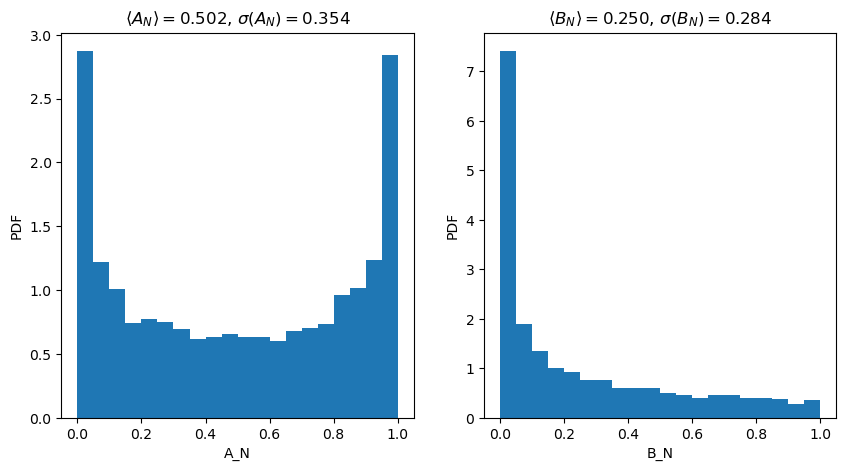

In [10]:
# Compute histograms
A_hist, _ = np.histogram(A_N, bins=20, range=(0,1), density=True)
B_hist, _ = np.histogram(B_N, bins=20, range=(0,1), density=True)

# Compute means and standard deviations
A_mean = np.mean(A_N)
A_std = np.std(A_N)
B_mean = np.mean(B_N)
B_std = np.std(B_N)

# Plot histograms
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(A_N, bins=20, range=(0,1), density=True)
ax[0].set_xlabel('A_N')
ax[0].set_ylabel('PDF')
ax[0].set_title(r'$\langle A_N \rangle = {:.3f}$, $\sigma(A_N) = {:.3f}$'.format(A_mean, A_std))
ax[1].hist(B_N, bins=20, range=(0,1), density=True)
ax[1].set_xlabel('B_N')
ax[1].set_ylabel('PDF')
ax[1].set_title(r'$\langle B_N \rangle = {:.3f}$, $\sigma(B_N) = {:.3f}$'.format(B_mean, B_std))
plt.show()

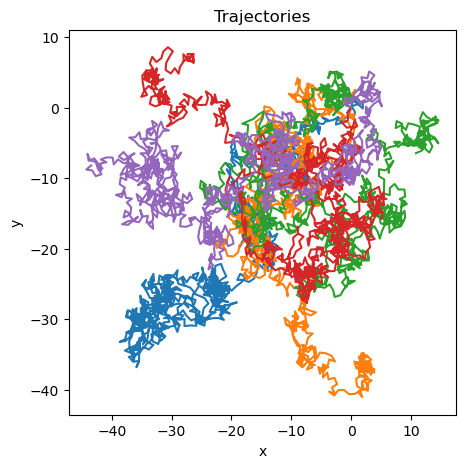

In [11]:
# Plot trajectories
fig, ax = plt.subplots(figsize=(5, 5))
for i in range(5):
    x = np.zeros(N+1)
    y = np.zeros(N+1)
    for j in range(N):
        theta = np.random.uniform(0, 2*np.pi)
        x[j+1] = x[j] + np.cos(theta)
        y[j+1] = y[j] + np.sin(theta)
    ax.plot(x, y)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Trajectories')
plt.show()

# 3

In [14]:
def random_walk_g(graph: nx.Graph, origin: int, num_steps: int, title_name: str, visualize: bool = True) -> Dict[int, int]:
    """
    Simulates a random walk on a given graph starting from a given origin node.

    Args:
        graph (nx.Graph): The networkx graph to simulate the random walk on.
        origin (int): The node to start the random walk from.
        num_steps (int): The number of steps to take in the random walk.
        title_name (str): Prefix to be used in the file names.
        visualize (bool, optional): Whether to visualize the random walk and save it as a gif. Defaults to True.

    Returns:
        visited (Dict[int, int]): A dictionary with the visited counts for each node in the graph.

    """
    pos = nx.spring_layout(graph, seed=42)
    current_node = origin
    visited = {node: 0 for node in graph.nodes()}
    visited[origin] = 1
    images = []
    for i in range(num_steps):
        neighbors = list(graph.neighbors(current_node))
        next_node = random.choice(neighbors)
        visited[next_node] += 1
        current_node = next_node
        if visualize:
            fig, ax = plt.subplots()
            nx.draw_networkx_nodes(graph, pos, node_size=200, alpha=0.8,
                                   node_color=[visited[node] for node in graph.nodes()])
            nx.draw_networkx_edges(graph, pos, alpha=0.2)
            plt.axis('off')
            plt.title(f"Step {i+1}")
            filename = f"{title_name}_{i:04d}.png"
            plt.savefig(filename, dpi=300)
            images.append(imageio.imread(filename))
            plt.close()
    if visualize:
        imageio.mimsave(f'{title_name}_g.gif', images, fps=10)
    return visited

In [15]:
# Example usage
G = nx.grid_2d_graph(5, 5)
origin = (2, 2)
visited = random_walk_g(G, origin, num_steps=20, title_name="grid_2d_graph")
print("Visited nodes:", visited)

Visited nodes: {(0, 0): 0, (0, 1): 0, (0, 2): 0, (0, 3): 0, (0, 4): 1, (1, 0): 0, (1, 1): 0, (1, 2): 1, (1, 3): 5, (1, 4): 2, (2, 0): 0, (2, 1): 0, (2, 2): 2, (2, 3): 6, (2, 4): 0, (3, 0): 0, (3, 1): 1, (3, 2): 1, (3, 3): 2, (3, 4): 0, (4, 0): 0, (4, 1): 0, (4, 2): 0, (4, 3): 0, (4, 4): 0}


In [17]:
# Estimate average hitting times
G = nx.grid_2d_graph(5, 5)
origin = (2, 2)
N = 100  # increase for more accurate estimates
total_hits = {node: 0 for node in G.nodes()}
for i in range(N):
    visited = random_walk_g(G, origin, num_steps=N, title_name="grid_2d_graph", visualize=False)
    for node, hits in visited.items():
        total_hits[node] += hits
avg_hits = {node: total_hits[node] / N for node in G.nodes()}
print("Average hitting times:", avg_hits)

Average hitting times: {(0, 0): 2.55, (0, 1): 3.95, (0, 2): 3.92, (0, 3): 3.57, (0, 4): 2.34, (1, 0): 4.13, (1, 1): 5.55, (1, 2): 5.66, (1, 3): 5.34, (1, 4): 3.69, (2, 0): 3.86, (2, 1): 5.57, (2, 2): 6.02, (2, 3): 4.43, (2, 4): 3.53, (3, 0): 3.51, (3, 1): 4.97, (3, 2): 5.24, (3, 3): 4.53, (3, 4): 3.55, (4, 0): 2.4, (4, 1): 3.54, (4, 2): 3.72, (4, 3): 3.16, (4, 4): 2.27}


In [16]:
# Example usage
G1 = nx.barbell_graph(10, 2)
origin = 0
visited = random_walk_g(G1, origin, num_steps=20, title_name="barbell_graph")
print("Visited nodes:", visited)

Visited nodes: {0: 1, 1: 0, 2: 0, 3: 1, 4: 0, 5: 1, 6: 0, 7: 0, 8: 0, 9: 2, 10: 2, 11: 2, 12: 3, 13: 2, 14: 2, 15: 1, 16: 0, 17: 0, 18: 2, 19: 0, 20: 0, 21: 2}


In [18]:
# Estimate average hitting times
G1 = nx.barbell_graph(10, 2)
origin = 0
N = 100  # increase for more accurate estimates
total_hits = {node: 0 for node in G1.nodes()}
for i in range(N):
    visited = random_walk_g(G1, origin, num_steps=N, title_name="barbell_graph", visualize=False)
    for node, hits in visited.items():
        total_hits[node] += hits
avg_hits = {node: total_hits[node] / N for node in G1.nodes()}
print("Average hitting times:", avg_hits)

Average hitting times: {0: 9.52, 1: 8.29, 2: 8.84, 3: 8.67, 4: 8.31, 5: 8.49, 6: 8.77, 7: 8.22, 8: 8.5, 9: 8.78, 10: 1.19, 11: 0.69, 12: 1.55, 13: 1.4, 14: 1.15, 15: 1.35, 16: 1.01, 17: 1.22, 18: 1.14, 19: 1.4, 20: 1.26, 21: 1.25}


In [19]:
# Example usage
G2 = nx.watts_strogatz_graph(100, 4, 0.3)
origin = 0
visited = random_walk_g(G2, origin, num_steps=20, title_name="watts_strogatz_graph")
print("Visited nodes:", visited)

Visited nodes: {0: 1, 1: 1, 2: 3, 3: 1, 4: 5, 5: 5, 6: 3, 7: 2, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 0, 50: 0, 51: 0, 52: 0, 53: 0, 54: 0, 55: 0, 56: 0, 57: 0, 58: 0, 59: 0, 60: 0, 61: 0, 62: 0, 63: 0, 64: 0, 65: 0, 66: 0, 67: 0, 68: 0, 69: 0, 70: 0, 71: 0, 72: 0, 73: 0, 74: 0, 75: 0, 76: 0, 77: 0, 78: 0, 79: 0, 80: 0, 81: 0, 82: 0, 83: 0, 84: 0, 85: 0, 86: 0, 87: 0, 88: 0, 89: 0, 90: 0, 91: 0, 92: 0, 93: 0, 94: 0, 95: 0, 96: 0, 97: 0, 98: 0, 99: 0}


In [20]:
# Estimate average hitting times
G = nx.grid_2d_graph(5, 5)
origin = 0
N = 100  # increase for more accurate estimates
total_hits = {node: 0 for node in G2.nodes()}
for i in range(N):
    visited = random_walk_g(G2, origin, num_steps=N, title_name="watts_strogatz_graph", visualize=False)
    for node, hits in visited.items():
        total_hits[node] += hits
avg_hits = {node: total_hits[node] / N for node in G2.nodes()}
print("Average hitting times:", avg_hits)

Average hitting times: {0: 2.65, 1: 2.2, 2: 2.29, 3: 1.25, 4: 1.21, 5: 1.34, 6: 2.03, 7: 1.04, 8: 1.01, 9: 0.91, 10: 0.8, 11: 0.56, 12: 0.64, 13: 0.69, 14: 0.77, 15: 0.96, 16: 0.4, 17: 0.49, 18: 0.67, 19: 0.97, 20: 0.62, 21: 0.69, 22: 0.73, 23: 0.47, 24: 1.02, 25: 0.82, 26: 1.14, 27: 1.46, 28: 0.77, 29: 0.43, 30: 0.67, 31: 0.69, 32: 0.78, 33: 1.42, 34: 0.56, 35: 0.81, 36: 0.75, 37: 0.88, 38: 1.6, 39: 1.12, 40: 0.81, 41: 0.88, 42: 0.87, 43: 1.34, 44: 0.5, 45: 0.71, 46: 0.6, 47: 0.76, 48: 1.15, 49: 1.88, 50: 0.61, 51: 0.83, 52: 1.66, 53: 1.05, 54: 0.91, 55: 0.3, 56: 0.73, 57: 0.76, 58: 0.45, 59: 0.98, 60: 0.84, 61: 1.02, 62: 0.79, 63: 1.21, 64: 1.01, 65: 0.72, 66: 0.94, 67: 1.06, 68: 0.89, 69: 1.33, 70: 1.01, 71: 1.62, 72: 1.38, 73: 1.38, 74: 1.32, 75: 1.33, 76: 0.92, 77: 1.73, 78: 1.76, 79: 1.19, 80: 0.68, 81: 0.95, 82: 1.16, 83: 0.92, 84: 0.87, 85: 0.82, 86: 0.89, 87: 0.53, 88: 0.72, 89: 0.82, 90: 0.59, 91: 0.64, 92: 0.46, 93: 0.82, 94: 0.95, 95: 1.02, 96: 1.06, 97: 1.95, 98: 2.21, 99: